<a href="https://www.pieriandata.com"><img src="../Pierian_Data_Logo.PNG"></a>
<strong><center>Copyright by Pierian Data Inc.</center></strong> 
<strong><center>Created by Jose Marcial Portilla.</center></strong>

# Keras Regression Code Along Project 

Let's now apply our knowledge to a more realistic data set. Here we will also focus on feature engineering and cleaning our data!

## The Data

We will be using data from a Kaggle data set:

https://www.kaggle.com/harlfoxem/housesalesprediction

#### Feature Columns
    
* id - Unique ID for each home sold
* date - Date of the home sale
* price - Price of each home sold
* bedrooms - Number of bedrooms
* bathrooms - Number of bathrooms, where .5 accounts for a room with a toilet but no shower
* sqft_living - Square footage of the apartments interior living space
* sqft_lot - Square footage of the land space
* floors - Number of floors
* waterfront - A dummy variable for whether the apartment was overlooking the waterfront or not
* view - An index from 0 to 4 of how good the view of the property was
* condition - An index from 1 to 5 on the condition of the apartment,
* grade - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design.
* sqft_above - The square footage of the interior housing space that is above ground level
* sqft_basement - The square footage of the interior housing space that is below ground level
* yr_built - The year the house was initially built
* yr_renovated - The year of the house’s last renovation
* zipcode - What zipcode area the house is in
* lat - Lattitude
* long - Longitude
* sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors
* sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
df = pd.read_csv('../data/kc_house_data.csv') #kaggle house data

# Exploratory Data Analysis

In [10]:
#quick way of searching df for any nulls
df.isnull().sum()
#observation: we see that we have no missing data!

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [12]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,21597.0,4.580474e+09,2.876736e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21597.0,5.402966e+05,3.673681e+05,7.800000e+04,3.220000e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21597.0,3.373200e+00,9.262989e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21597.0,2.115826e+00,7.689843e-01,5.000000e-01,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21597.0,2.080322e+03,9.181061e+02,3.700000e+02,1.430000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21597.0,1.509941e+04,4.141264e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068500e+04,1.651359e+06
floors,21597.0,1.494096e+00,5.396828e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21597.0,7.547345e-03,8.654900e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21597.0,2.342918e-01,7.663898e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21597.0,3.409825e+00,6.505456e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


In [13]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


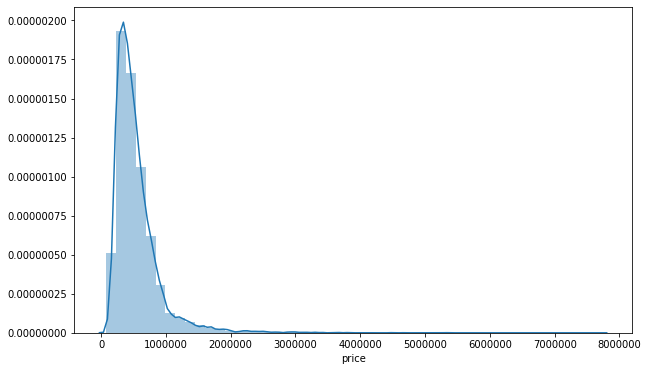

In [15]:
#examine distribution of house prices
plt.figure(figsize=(10,6))
sns.distplot(df['price'])
#observation: looks like most of our houses are selling around 500K-1M range
#extreme outliers appear to occur after 2M point

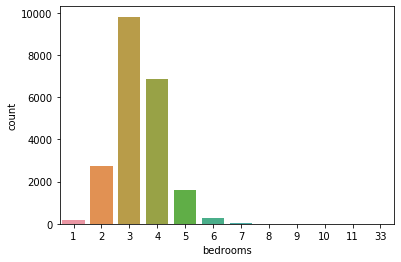

In [18]:
#examine number of bedroom observations
sns.countplot(df['bedrooms'])
#observations: 3 bedrooms is most common, 2-5 covers almost entire df

In [19]:
#pull up correlations
df.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016772,0.001150,0.005162,-0.012241,-0.131911,0.018608,-0.002727,0.011536,-0.023803,0.008188,-0.010799,-0.005193,0.021617,-0.016925,-0.008211,-0.001798,0.020672,-0.002701,-0.138557
price,-0.016772,1.000000,0.308787,0.525906,0.701917,0.089876,0.256804,0.266398,0.397370,0.036056,0.667951,0.605368,0.323799,0.053953,0.126424,-0.053402,0.306692,0.022036,0.585241,0.082845
bedrooms,0.001150,0.308787,1.000000,0.514508,0.578212,0.032471,0.177944,-0.006834,0.080008,0.026496,0.356563,0.479386,0.302808,0.155670,0.018389,-0.154092,-0.009951,0.132054,0.393406,0.030690
bathrooms,0.005162,0.525906,0.514508,1.000000,0.755758,0.088373,0.502582,0.063744,0.188386,-0.126479,0.665838,0.686668,0.283440,0.507173,0.050544,-0.204786,0.024280,0.224903,0.569884,0.088303
sqft_living,-0.012241,0.701917,0.578212,0.755758,1.000000,0.173453,0.353953,0.103854,0.284709,-0.059445,0.762779,0.876448,0.435130,0.318152,0.055308,-0.199802,0.052155,0.241214,0.756402,0.184342
sqft_lot,-0.131911,0.089876,0.032471,0.088373,0.173453,1.000000,-0.004814,0.021632,0.074900,-0.008830,0.114731,0.184139,0.015418,0.052946,0.007686,-0.129586,-0.085514,0.230227,0.144763,0.718204
floors,0.018608,0.256804,0.177944,0.502582,0.353953,-0.004814,1.000000,0.023755,0.028814,-0.264075,0.458794,0.523989,-0.245715,0.489193,0.006427,-0.059541,0.049239,0.125943,0.280102,-0.010722
waterfront,-0.002727,0.266398,-0.006834,0.063744,0.103854,0.021632,0.023755,1.000000,0.401971,0.016611,0.082888,0.072109,0.080559,-0.026153,0.092873,0.030272,-0.014306,-0.041904,0.086507,0.030781
view,0.011536,0.397370,0.080008,0.188386,0.284709,0.074900,0.028814,0.401971,1.000000,0.045999,0.251728,0.167609,0.277078,-0.053636,0.103951,0.084622,0.005871,-0.078107,0.280681,0.072904
condition,-0.023803,0.036056,0.026496,-0.126479,-0.059445,-0.008830,-0.264075,0.016611,0.045999,1.000000,-0.146896,-0.158904,0.173849,-0.361592,-0.060788,0.002888,-0.015102,-0.105877,-0.093072,-0.003126


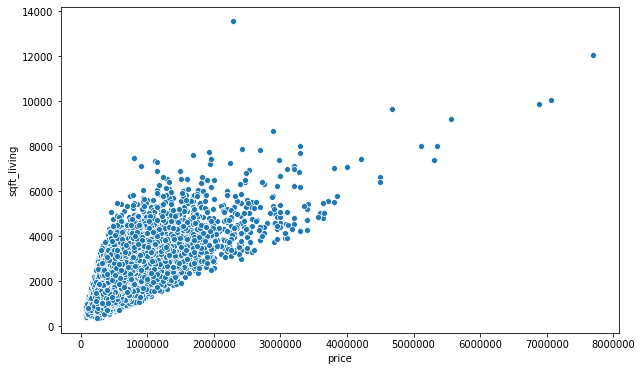

In [23]:
#examine relationship between house price and sqft_living (had 0.7 correlation)
plt.figure(figsize=(10,6))
sns.scatterplot(x='price',y='sqft_living',data=df)
#observations: we indeed observe a positive relationship

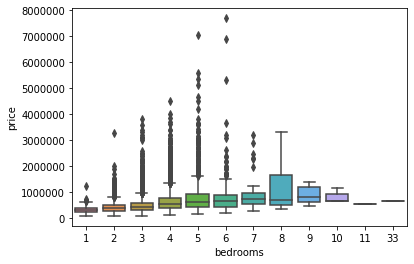

In [24]:
#compare house price by # of bedrooms
sns.boxplot(x='bedrooms',y='price',data=df)
#observations: notice that prices increase with # of bedrooms

### Geographical Properties

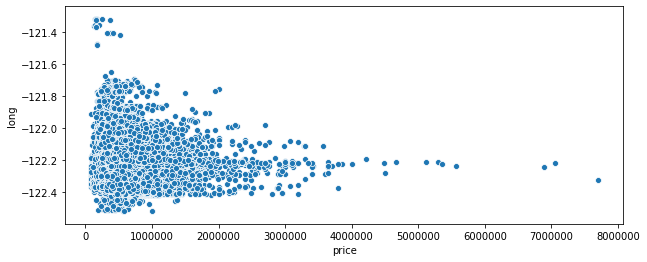

In [28]:
#explore price by longitude (seaborn does not have geographical plotting 
#abilities, but can use a scatterplot quite effectively)
plt.figure(figsize=(10,4))
sns.scatterplot(x='price',y='long',data=df)
#observations: there's definitely some variation (would expect a fat blob if
#there was no differentiation by longitude) - notice a zone at around -121.4
#that contains only low price observations...this could be the ghetto; also
#notice a particular area where there tends to be extremely high prices

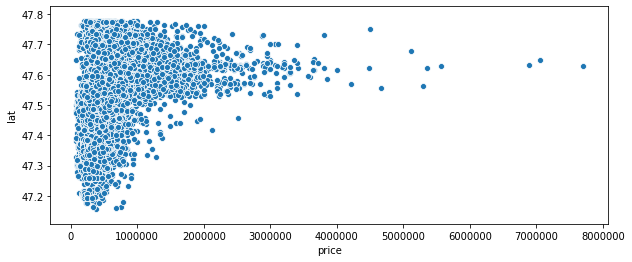

In [29]:
#also explore latitude
plt.figure(figsize=(10,4))
sns.scatterplot(x='price',y='lat',data=df)
#observations: similar to longitude findings above

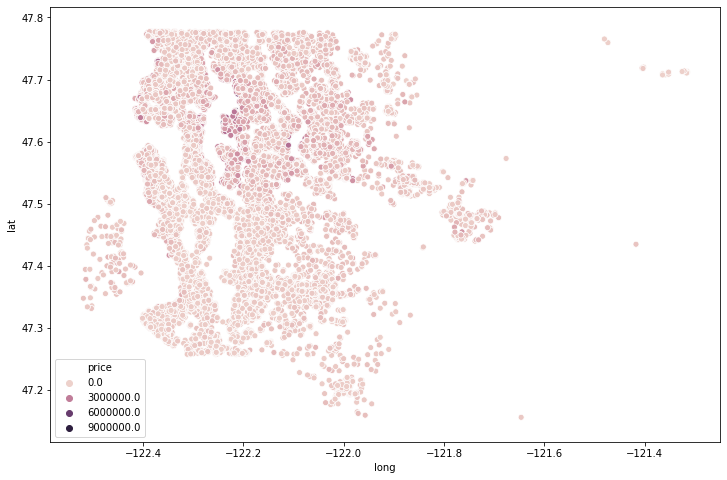

In [32]:
#create a scatterplot of longitude by latitude with price as hue
plt.figure(figsize=(12,8))
sns.scatterplot(x='long',y='lat',data=df,hue='price')
#observations: can google King Country, Seattle map and see that our scatter
#plot below actually resembles the shape! we actually see an area of darker
#points that matches up with our individual coordinate findings above
#note that the gradient here is a bit tough to determine due to the extreme
#outliers that are present in our data (6M and 9M are essentially irrelevant)

In [35]:
#attempt to identify price outliers to potentially drop
df.sort_values(by='price',ascending=False).head(20)
#cutoff probably makes sense around the 3M mark (refer back to our price histogram)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7245,6762700020,10/13/2014,7700000.0,6,8.00,12050,27600,2.5,0,3,...,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800
3910,9808700762,6/11/2014,7060000.0,5,4.50,10040,37325,2.0,1,2,...,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449
9245,9208900037,9/19/2014,6890000.0,6,7.75,9890,31374,2.0,0,4,...,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730
4407,2470100110,8/4/2014,5570000.0,5,5.75,9200,35069,2.0,0,0,...,13,6200,3000,2001,0,98039,47.6289,-122.233,3560,24345
1446,8907500070,4/13/2015,5350000.0,5,5.00,8000,23985,2.0,0,4,...,12,6720,1280,2009,0,98004,47.6232,-122.220,4600,21750
1313,7558700030,4/13/2015,5300000.0,6,6.00,7390,24829,2.0,1,4,...,12,5000,2390,1991,0,98040,47.5631,-122.210,4320,24619
1162,1247600105,10/20/2014,5110000.0,5,5.25,8010,45517,2.0,1,4,...,12,5990,2020,1999,0,98033,47.6767,-122.211,3430,26788
8085,1924059029,6/17/2014,4670000.0,5,6.75,9640,13068,1.0,1,4,...,12,4820,4820,1983,2009,98040,47.5570,-122.210,3270,10454
2624,7738500731,8/15/2014,4500000.0,5,5.50,6640,40014,2.0,1,4,...,12,6350,290,2004,0,98155,47.7493,-122.280,3030,23408
8629,3835500195,6/18/2014,4490000.0,4,3.00,6430,27517,2.0,0,0,...,12,6430,0,2001,0,98004,47.6208,-122.219,3720,14592


In [37]:
#check the total number of records (i.e., houses) in our df
len(df)

21597

In [38]:
#if we wanted to cut off 1% of it, how much would that be?
len(df)*0.01 #about 216 records

215.97

In [39]:
#create a df that has the top 1% of records removed
non_top_1_perc = df.sort_values(by='price',ascending=False).iloc[216:]

In [44]:
non_top_1_perc['price'].max()
#observations: we see that our new highest price record is just under 2M

1970000.0

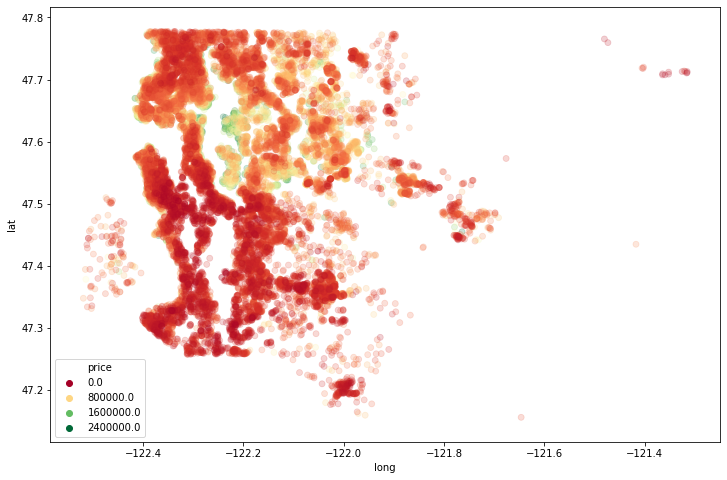

In [51]:
#cleaner graph using our new df without major outliers
plt.figure(figsize=(12,8))
sns.scatterplot(x='long',y='lat',data=non_top_1_perc,hue='price',
               edgecolor=None,alpha=0.2,palette='RdYlGn')
#observations: we can see the expensive parts of King's County in yellow and green
#notice that they tend to border the water

### Other Features

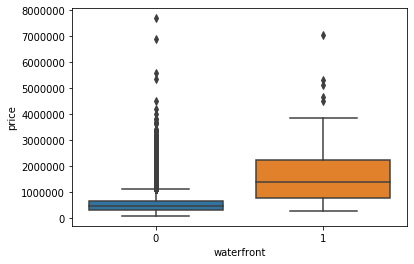

In [53]:
#investigate price by whether or not the house is on the waterfront
sns.boxplot(x='waterfront',y='price',data=df)
#observations: our suspicion is correct, see a drastic difference in price

## Working with Feature Data

In [54]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [55]:
df.info()
#notice date is an object right now

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       21597 non-null int64
view             21597 non-null int64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null int64
yr_built         21597 non-null int64
yr_renovated     21597 non-null int64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 3.5+ MB


In [56]:
#we can drop id...meaningless (although in some scenarios it may capture a chronological pattern of sorts)
df = df.drop('id',axis=1)

In [57]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


### Feature Engineering from Date

In [59]:
df['date'] = pd.to_datetime(df['date'])

In [61]:
df['date'] #note that formatting has changed

0       2014-10-13
1       2014-12-09
2       2015-02-25
3       2014-12-09
4       2015-02-18
           ...    
21592   2014-05-21
21593   2015-02-23
21594   2014-06-23
21595   2015-01-16
21596   2014-10-15
Name: date, Length: 21597, dtype: datetime64[ns]

In [62]:
df.info() #and shows up as datetime type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 20 columns):
date             21597 non-null datetime64[ns]
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       21597 non-null int64
view             21597 non-null int64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null int64
yr_built         21597 non-null int64
yr_renovated     21597 non-null int64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: datetime64[ns](1), float64(5), int64(14)
memory usage: 3.3 MB


In [66]:
#create a year feature
df['year'] = df['date'].apply(lambda date: date.year)

In [68]:
#create a month feature
df['month'] = df['date'].apply(lambda date: date.month)

In [69]:
df.head() #now notice our year and month features at end of df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2


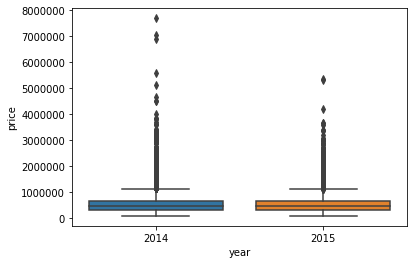

In [71]:
#examine price by year
sns.boxplot(x='year',y='price',data=df)
#observations: nothing really significant year over year

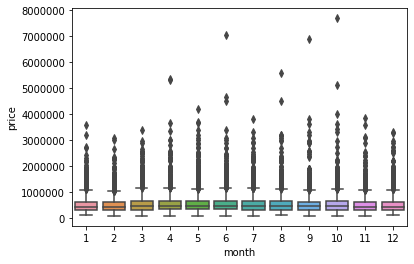

In [72]:
#examine price by month
sns.boxplot(x='month',y='price',data=df)

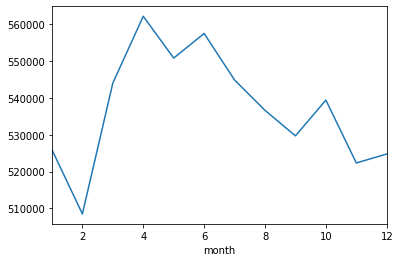

In [73]:
df.groupby(by='month').mean()['price'].plot()
#notice that the y axis is quite close so changes are kind of overexaggerated,
#although we do see some variability in month it appears

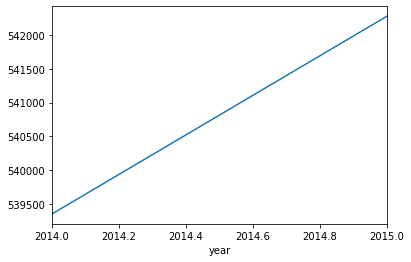

In [27]:
#line plot for year as well
df.groupby('year').mean()['price'].plot()

In [74]:
#now that we've extracted the temporal features of interest, we can drop date
df = df.drop('date',axis=1)

In [76]:
df.head() #it is indeed gone

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,...,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,...,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2


In [30]:
# https://i.pinimg.com/originals/4a/ab/31/4aab31ce95d5b8474fd2cc063f334178.jpg
# May be worth considering to remove this or feature engineer categories from it
df['zipcode'].value_counts()
#observations: we have 70 unique zipcodes...could use as a category but 70 is excessive

98103    602
98038    589
98115    583
98052    574
98117    553
        ... 
98102    104
98010    100
98024     80
98148     57
98039     50
Name: zipcode, Length: 70, dtype: int64

In [77]:
#we'll drop zipcode
df = df.drop('zipcode',axis=1)

In [78]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,year,month
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650,2014,10
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639,2014,12
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062,2015,2
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000,2014,12
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503,2015,2


In [82]:
# could make sense due to scaling, higher should correlate to more value
df['yr_renovated'].value_counts()
#observation: most of our records are 0 (i.e., they've never been renovated)
#could feature as a dummy variable (1 for renovated)
#after some more thought...should be alright as is, the numeric relationship here
#should capture what we expect, renovation years that are more recent will be
#associated with higher prices (and will certainly be more $ than un-renovated)

0       20683
2014       91
2013       37
2003       36
2000       35
        ...  
1934        1
1959        1
1951        1
1948        1
1944        1
Name: yr_renovated, Length: 70, dtype: int64

In [86]:
#examine basement size
df['sqft_basement'].value_counts()
#observations: again we have quite a few zeroes since not every house has a basement
#using the same logic we can likely keep this as is (or could turn into a dummy)

0       13110
600       221
700       218
500       214
800       206
        ...  
792         1
2590        1
935         1
2390        1
248         1
Name: sqft_basement, Length: 306, dtype: int64

## Scaling and Train Test Split

In [87]:
#set our predictors and our response (remember to use numpy arrays)
X = df.drop('price',axis=1).values
y = df['price'].values

In [91]:
#preview
X

array([[3.000e+00, 1.000e+00, 1.180e+03, ..., 5.650e+03, 2.014e+03,
        1.000e+01],
       [3.000e+00, 2.250e+00, 2.570e+03, ..., 7.639e+03, 2.014e+03,
        1.200e+01],
       [2.000e+00, 1.000e+00, 7.700e+02, ..., 8.062e+03, 2.015e+03,
        2.000e+00],
       ...,
       [2.000e+00, 7.500e-01, 1.020e+03, ..., 2.007e+03, 2.014e+03,
        6.000e+00],
       [3.000e+00, 2.500e+00, 1.600e+03, ..., 1.287e+03, 2.015e+03,
        1.000e+00],
       [2.000e+00, 7.500e-01, 1.020e+03, ..., 1.357e+03, 2.014e+03,
        1.000e+01]])

In [92]:
from sklearn.model_selection import train_test_split

In [94]:
#split into our train/test matrices
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [96]:
#preview
X_train

array([[4.0000e+00, 1.0000e+00, 2.2900e+03, ..., 6.3000e+03, 2.0140e+03,
        9.0000e+00],
       [3.0000e+00, 2.2500e+00, 1.6300e+03, ..., 3.1310e+03, 2.0140e+03,
        6.0000e+00],
       [4.0000e+00, 3.5000e+00, 2.8500e+03, ..., 5.7080e+03, 2.0150e+03,
        5.0000e+00],
       ...,
       [2.0000e+00, 1.7500e+00, 1.8000e+03, ..., 7.4000e+03, 2.0150e+03,
        4.0000e+00],
       [3.0000e+00, 2.0000e+00, 1.5000e+03, ..., 1.4013e+04, 2.0150e+03,
        4.0000e+00],
       [2.0000e+00, 1.0000e+00, 1.1600e+03, ..., 5.0760e+03, 2.0150e+03,
        1.0000e+00]])

### Scaling

In [155]:
#now we look to scale all our features
from sklearn.preprocessing import MinMaxScaler

In [156]:
scaler = MinMaxScaler()

In [103]:
#recall that we only fit & transform our train set...
X_train = scaler.fit_transform(X_train) #fit_transform does both!

In [104]:
#not our test set...we only transform this (don't want to assume prior information with our test set through fitting)
X_test = scaler.transform(X_test)

In [105]:
X_train.shape

(15117, 19)

In [106]:
X_test.shape

(6480, 19)

## Creating a Model

In [109]:
#import necessary packages
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [111]:
#revisit the shape of our training data
X_train.shape
#observe that we have 19 features...this is likely a good choice for # neurons

(15117, 19)

In [112]:
model = Sequential() #create empty sequential model

model.add(Dense(units=19, activation='relu')) #add in our individual layers
model.add(Dense(19, activation='relu')) #with 19 neurons based chosen from # features here
model.add(Dense(19, activation='relu'))
model.add(Dense(19, activation='relu'))

model.add(Dense(1)) #model end point (1 outcome - regression quantity)

model.compile(optimizer='adam',loss='mse') #select optimizer (adam) and loss function (mse here for regression quantity)

## Training the Model

In [113]:
#notice we pass in our actual validation data (test set)...hence we are both
#training on our train data and validating on our actual test data too

#ALSO, we will set a batch_size since our data is quite large (20k records);
#the smaller we set batch_size (default is 32) the longer training will take
#but the less likely that you will overfit

model.fit(x=X_train,y=y_train,validation_data=(X_test,y_test)
          ,batch_size=128,epochs=400)

Train on 15117 samples, validate on 6480 samples
Epoch 1/400
15117/15117 [==============================] - 2s 128us/sample - loss: 430242305069.4524 - val_loss: 418924502534.3210
Epoch 2/400
15117/15117 [==============================] - 0s 23us/sample - loss: 429083317238.1779 - val_loss: 414673223720.4543
Epoch 3/400
15117/15117 [==============================] - 0s 22us/sample - loss: 410845355355.1588 - val_loss: 372089346336.2371
Epoch 4/400
15117/15117 [==============================] - 0s 20us/sample - loss: 321347145137.5930 - val_loss: 231518918418.3309
Epoch 5/400
15117/15117 [==============================] - 0s 20us/sample - loss: 162783692661.6784 - val_loss: 104487802005.1753
Epoch 6/400
15117/15117 [==============================] - 0s 20us/sample - loss: 100756715353.2283 - val_loss: 94861765846.9136
Epoch 7/400
15117/15117 [==============================] - 0s 20us/sample - loss: 97257351910.0054 - val_loss: 93203857064.1383
Epoch 8/400
15117/15117 [==================

15117/15117 [==============================] - 0s 18us/sample - loss: 33188624532.4824 - val_loss: 31751863035.5753
Epoch 128/400
15117/15117 [==============================] - 0s 18us/sample - loss: 33145816476.0521 - val_loss: 31708725617.1457
Epoch 129/400
15117/15117 [==============================] - 0s 17us/sample - loss: 33217843407.6857 - val_loss: 31653383079.5062
Epoch 130/400
15117/15117 [==============================] - 0s 25us/sample - loss: 33116361309.5805 - val_loss: 31626245527.0716
Epoch 131/400
15117/15117 [==============================] - 0s 15us/sample - loss: 33056366628.4432 - val_loss: 31837411297.6593
Epoch 132/400
15117/15117 [==============================] - 0s 20us/sample - loss: 32986904412.4797 - val_loss: 31551694241.1852
Epoch 133/400
15117/15117 [==============================] - 0s 18us/sample - loss: 32995485659.8277 - val_loss: 31553121505.0272
Epoch 134/400
15117/15117 [==============================] - 0s 26us/sample - loss: 32944270209.9390 - v

15117/15117 [==============================] - 0s 14us/sample - loss: 30732956432.8160 - val_loss: 28816511744.6321
Epoch 254/400
15117/15117 [==============================] - 0s 14us/sample - loss: 30698625437.0005 - val_loss: 28749625440.0790
Epoch 255/400
15117/15117 [==============================] - 0s 14us/sample - loss: 30669648107.7293 - val_loss: 28886065743.6444
Epoch 256/400
15117/15117 [==============================] - 0s 15us/sample - loss: 30687203646.6410 - val_loss: 28730070711.3086
Epoch 257/400
15117/15117 [==============================] - 0s 18us/sample - loss: 30688986448.9981 - val_loss: 28696841602.8444
Epoch 258/400
15117/15117 [==============================] - 0s 13us/sample - loss: 30667901247.1829 - val_loss: 28729529184.7111
Epoch 259/400
15117/15117 [==============================] - 0s 14us/sample - loss: 30645864706.6249 - val_loss: 28709539253.4123
Epoch 260/400
15117/15117 [==============================] - 0s 15us/sample - loss: 30653528861.0936 - v

Epoch 316/400
15117/15117 [==============================] - 0s 15us/sample - loss: 30030529717.0645 - val_loss: 27923084073.0864
Epoch 317/400
15117/15117 [==============================] - 0s 14us/sample - loss: 30044907740.9624 - val_loss: 27938874082.2914
Epoch 318/400
15117/15117 [==============================] - 0s 18us/sample - loss: 29992897369.4992 - val_loss: 28141673949.8667
Epoch 319/400
15117/15117 [==============================] - 0s 20us/sample - loss: 30050768722.9964 - val_loss: 27988916709.4519
Epoch 320/400
15117/15117 [==============================] - 0s 18us/sample - loss: 29994651325.3963 - val_loss: 28032356357.0568
Epoch 321/400
15117/15117 [==============================] - 0s 15us/sample - loss: 30049541720.2291 - val_loss: 27954498694.0049
Epoch 322/400
15117/15117 [==============================] - 0s 17us/sample - loss: 30017404481.6046 - val_loss: 28054742979.3185
Epoch 323/400
15117/15117 [==============================] - 0s 17us/sample - loss: 299874

15117/15117 [==============================] - ETA: 0s - loss: 29121345223.111 - 0s 16us/sample - loss: 29435946606.5828 - val_loss: 27127085167.2494
Epoch 380/400
15117/15117 [==============================] - 0s 16us/sample - loss: 29411589158.0012 - val_loss: 27174331697.9358
Epoch 381/400
15117/15117 [==============================] - 0s 14us/sample - loss: 29398808508.3972 - val_loss: 27125611026.9630
Epoch 382/400
15117/15117 [==============================] - 0s 15us/sample - loss: 29541026773.7652 - val_loss: 27125027503.7235
Epoch 383/400
15117/15117 [==============================] - 0s 14us/sample - loss: 29432628291.1287 - val_loss: 27276634617.6790
Epoch 384/400
15117/15117 [==============================] - 0s 15us/sample - loss: 29388785500.8862 - val_loss: 27106943254.1235
Epoch 385/400
15117/15117 [==============================] - 0s 17us/sample - loss: 29383255831.7253 - val_loss: 27121979756.0889
Epoch 386/400
15117/15117 [==============================] - 0s 14us/s

In [115]:
#can convert our model's loss function into a df
losses = pd.DataFrame(model.history.history)

In [116]:
losses
#observations: notice that now not only do we have our loss function in one
#column, but we also have our validation loss (on our test set!) in the other

,loss,val_loss
0,4.302423e+11,4.189245e+11
1,4.290833e+11,4.146732e+11
2,4.108454e+11,3.720893e+11
3,3.213471e+11,2.315189e+11
4,1.627837e+11,1.044878e+11
...,...,...
395,2.926557e+10,2.697068e+10
396,2.929696e+10,2.704823e+10
397,2.930493e+10,2.694089e+10
398,2.923450e+10,2.693195e+10


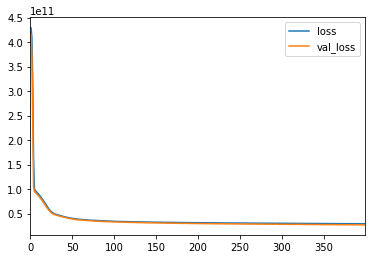

In [117]:
#we can now quickly see whether we are overfitting on our training data by comparing
#the loss functions on train vs on test
losses.plot()
#observations: we see that they are practically identical, we also see that
#it essentially levels off at 50 epochs ALTHOUGH we do see that validation_loss
#continues to decrease with training loss...this is an indicator that we CAN
#continue training as we haven't overfitted YET
#this exemplifies the "perfect" behaviour we want to see

# Evaluation on Test Data

https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics

In [118]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score

#### Predicting on Brand New Data

In [119]:
#quick view of what X_test matrix looks like
X_test

array([[0.1       , 0.08      , 0.04239917, ..., 0.00887725, 0.        ,
        0.63636364],
       [0.3       , 0.36      , 0.17269907, ..., 0.00993734, 0.        ,
        0.81818182],
       [0.2       , 0.24      , 0.12512927, ..., 0.00547073, 0.        ,
        0.90909091],
       ...,
       [0.1       , 0.08      , 0.05584281, ..., 0.00506255, 0.        ,
        1.        ],
       [0.3       , 0.2       , 0.22233713, ..., 0.00774485, 1.        ,
        0.09090909],
       [0.3       , 0.32      , 0.27611169, ..., 0.0196531 , 0.        ,
        0.45454545]])

In [121]:
#now we use our model to predict on the actual test set
predictions = model.predict(X_test)

In [123]:
#preview our predictions
predictions

array([[416250.16],
       [586475.9 ],
       [579423.2 ],
       ...,
       [398833.22],
       [592620.4 ],
       [692602.56]], dtype=float32)

In [126]:
#calculate MAE
mean_absolute_error(y_test, predictions)

101624.58167197145

In [128]:
#calculate MSE
mean_squared_error(y_test, predictions)

26908344615.623196

In [131]:
#for better interpretation, take RMSE (remember this is in the proper units for comparison)
np.sqrt(mean_squared_error(y_test,predictions))
#observations: comparing to our mean price (see below) this is about 30% of our mean
#this seems like a meh results

164037.63170572536

In [132]:
#take a look back at our average house price for reference
df['price'].mean()

540296.5735055795

In [133]:
#use explained variance score to try and get a deeper understanding of our evaluation metrics
explained_variance_score(y_test,predictions)
#observation: (max is 1) this tells us how much variance is actually being explained
#by our model...we see that we are explaining about 80% of our data's variance

0.7971058893163459

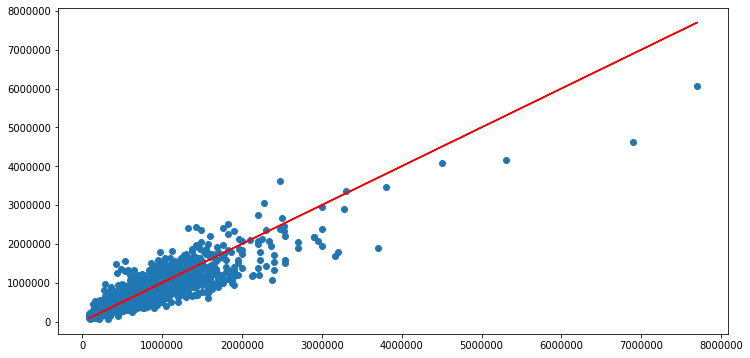

In [143]:
#can compare our predictions vs actuals via a scatter plot as well
plt.figure(figsize=(12,6))
plt.scatter(y_test,predictions)
#create perfect regression line on test actuals
plt.plot(y_test,y_test,'r')

#observations: we are quite good at predicting house prices up till 2M, but
#notice that we get kind of worse when attempting to deal with the extreme
#outliers...we should test running our model on our 1% filtered df, see separate workbook (although spoiler: didn't see improved results)

-------------
### Predicting on a brand new house

In [163]:
#randomly picking the features of the first house on og df
single_house = df.drop('price',axis=1).iloc[0]

In [164]:
single_house #we can see our single house features here

bedrooms            3.0000
bathrooms           1.0000
sqft_living      1180.0000
sqft_lot         5650.0000
floors              1.0000
waterfront          0.0000
view                0.0000
condition           3.0000
grade               7.0000
sqft_above       1180.0000
sqft_basement       0.0000
yr_built         1955.0000
yr_renovated        0.0000
lat                47.5112
long             -122.2570
sqft_living15    1340.0000
sqft_lot15       5650.0000
year             2014.0000
month              10.0000
Name: 0, dtype: float64

In [159]:
#don't forget to scale!
single_house = scaler.transform(single_house.values.reshape(-1,19))

NotFittedError: This MinMaxScaler instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [160]:
single_house

bedrooms            3.0000
bathrooms           1.0000
sqft_living      1180.0000
sqft_lot         5650.0000
floors              1.0000
waterfront          0.0000
view                0.0000
condition           3.0000
grade               7.0000
sqft_above       1180.0000
sqft_basement       0.0000
yr_built         1955.0000
yr_renovated        0.0000
lat                47.5112
long             -122.2570
sqft_living15    1340.0000
sqft_lot15       5650.0000
year             2014.0000
month              10.0000
Name: 0, dtype: float64

In [161]:
model.predict(single_house)

InvalidArgumentError:  Matrix size-incompatible: In[0]: [19,1], In[1]: [19,19]
	 [[node sequential/dense/Relu (defined at C:\Users\ianno\Anaconda3\lib\site-packages\tensorflow_core\python\framework\ops.py:1751) ]] [Op:__inference_keras_scratch_graph_138845]

Function call stack:
keras_scratch_graph


In [90]:
df.iloc[0]

price            221900.0000
bedrooms              3.0000
bathrooms             1.0000
sqft_living        1180.0000
sqft_lot           5650.0000
floors                1.0000
waterfront            0.0000
view                  0.0000
condition             3.0000
grade                 7.0000
sqft_above         1180.0000
sqft_basement         0.0000
yr_built           1955.0000
yr_renovated          0.0000
lat                  47.5112
long               -122.2570
sqft_living15      1340.0000
sqft_lot15         5650.0000
month                10.0000
year               2014.0000
Name: 0, dtype: float64